### Integrantes: <a class="tocSkip"></a>

**Ignacio Castro**

**Enzo Meneses**


### Instrucciones generales <a class="tocSkip"></a>

1. Forme un grupo de **máximo dos estudiantes**
1. Versione su trabajo usando un **repositorio <font color="red">privado</font> de github**. Agregue a su compañero y a su profesor (usuario github: phuijse) en la pestaña *Settings/Manage access*. No se aceptarán consultas si la tarea no está en github. No se evaluarán tareas que no estén en github.
1. Se evaluará el **resultado, la profundidad de su análisis y la calidad/orden de sus códigos** en base al último commit antes de la fecha y hora de entrega". Se bonificará a quienes muestren un método de trabajo incremental y ordenado según el histórico de *commits*
1. Sean honestos, ríganse por el [código de ética de la ACM](https://www.acm.org/about-acm/code-of-ethics-in-spanish)



# Tarea 2: Filtrado de señales

## Introducción


Un **electrocardiograma (ECG)** es un gráfico de voltaje (amplitud) en función del tiempo correspondiente a la actividad eléctrica del corazón. Cada etapa del ciclo cardíaco es representado por una letra: **P, Q, R, S y T**. La siguiente figura muestra un esquema de un ECG con dos pulsos.

<img src="cardio.png" width="600">


El ECG se usa para hacer diagnósticos y en particular para analizar la existencia de anormalidades en el ciclo cardiaco. La **frecuencia cardiaca**, es decir el inverso del intervalo RR, de un humano normal en reposo está en el rango de **60 y 100 latidos por minuto**



## Enunciado

El hospital base de Valdivia tiene un electrocardiógrafo que mide la ECG en miliVolts [mV] a una frecuencia de muestreo de $360$ [Hz]

Durante el proceso de captura ciertos errores provocaron que la señal se contamine con 

- **(A)** Un ruido asociado al sistema eléctrico
- **(B)** Un ruido de baja frecuencia causado por un desperfecto del sensor
- **(C)** Un ruido blanco de origen térmico 

Esto complica el análisis del médico por lo que el hospital base los contrata a ustedes para **diseñar un filtro que limpie la señal ECG**

Resuelva las actividades que se piden a continuación, respondiendo y analizando donde corresponda

<IPython.core.display.Javascript object>


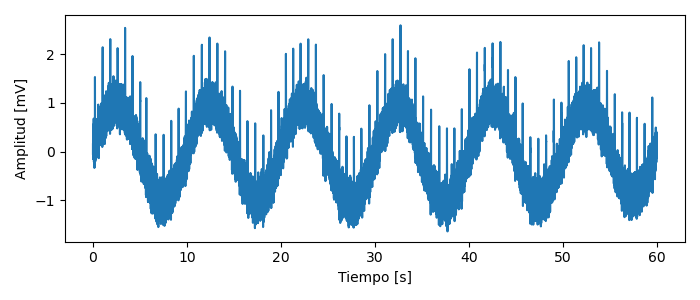

In [1]:
import numpy as np
import pickle
%matplotlib notebook
import matplotlib.pylab as plt
import scipy.signal
from scipy import fftpack

with open("ECG.pkl", "rb") as f:
    data = pickle.load(f)

Fs = 360
time = np.arange(len(data))/Fs
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time, data)
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud [mV]');

## Análisis (15%)

- Observe los primeros dos segundos de la señal, compare con el esquema mostrado en la introducción y discuta sobre los efectos causados por los ruidos **A**, **B** y **C** mencionados en el enunciado. Además responda  ¿Qué es un ruido blanco y que tipo de efecto introduce en la señal y en su espectro? ¿Qué es una tendencia y que tipo de efecto introduce en la señal y su espectro? 
- Calcule y muestre gráficamente el valor absoluto de la transformada de Fourier de la señal en función de la frecuencia y su espectrograma en función del tiempo y la frecuencia. Para el espectrograma decida el largo de ventana, traslape y tipo de ventana. Justifique su elección tomando en consideración el rango de frecuencias de un paciente normal y los *trade-off* aprendidos en clases
- En base a la señal, su espectro de magnitud y su espectrograma identifique la frecuencia central o el rango de frecuencias asociada a las tres fuentes de ruido. ¿En qué rango de frecuencias (Hz) se espera encontrar la señal de ritmo cardíaco de un humano normal en reposo?


<IPython.core.display.Javascript object>


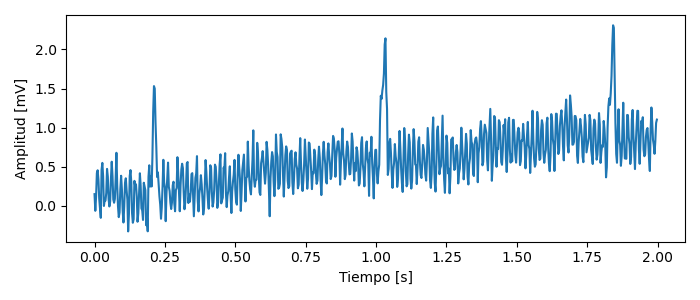

In [2]:
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time[:2*Fs], data[:2*Fs])
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud [mV]');

En este caso podemos observar 3 tipos de ruido, el ruido A corresponde a un ruido asociado al sistema electrico y tendera a tener frecuencias cercanas a los 60Hz, en la señal se ve que agrega más oscilaciones a la señal de modo que termina ocultado su forma. El ruido B corresponde a un ruido de baja frecuencia dara a la señal tendencia a subidas o bajadas. Finalmente el Corresponde a ruido blanco, que tiene una distribucion aleatoria y se distribuye por toda la señal, haciendo su forma más erratica y borrosa.

El ruido blanco corresponde a variaciones irregulares o aleatorios en la señal observada, y en el espectro se ve como varios espacios de baja densidad espectral sin un orden especifico (puede verse similar a la estatica en una televisión).

La tandencia se ve en la señal como un patron en su forma, y en el espectro se ve como una columna o fila de densidad espectral similar a la de la señal original.

In [3]:
def fourierfun(signal,Fs):
    data = fftpack.fft(signal)
    data_freq = fftpack.fftfreq(n=len(data), d=1/Fs)
    data_amp = np.abs(data)
    data_angle = np.angle(data)
    return data_freq,data_amp,data_angle

<IPython.core.display.Javascript object>


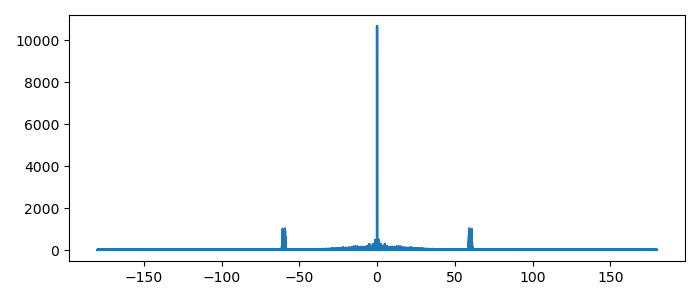

In [4]:
freqs,SA,SP=fourierfun(data,Fs)

fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(fftpack.fftshift(freqs),fftpack.fftshift(SA))

<IPython.core.display.Javascript object>


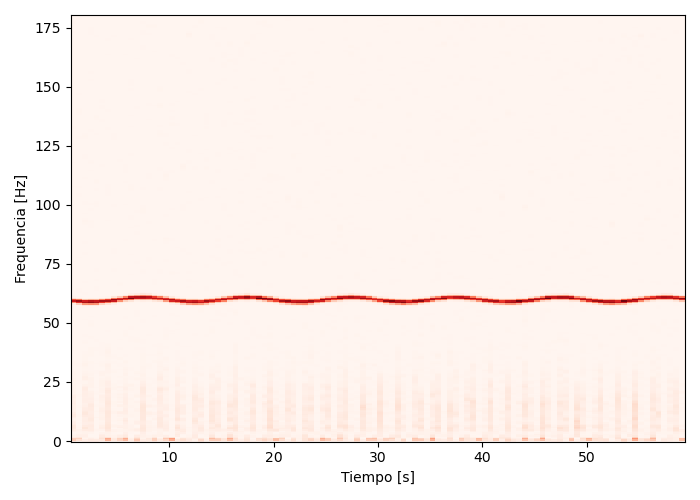

In [80]:
#Espectograma
Nw = 600
beta = 8.6
freqs, times, Sxx = scipy.signal.spectrogram(data, fs=Fs, nperseg=Nw, 
                                                 noverlap=Nw//1.5, window=('kaiser', beta))
fig, ax = plt.subplots(figsize=(7, 5), tight_layout=True, sharex=True, sharey=True)
ax.pcolormesh(times, freqs, Sxx, cmap=plt.cm.Reds, shading='auto');
ax.set_ylabel('Frequencia [Hz]');
ax.set_xlabel('Tiempo [s]');

Elegimos la ventana Kaiser pues es una ventana muy adaptable debido a su valor Beta, lo que permite ajustar el grado de importancia que se le daran a los lobulos laterales o principal con solo modificar este valor para emular otros tipos de ventanas, sin requerir cambiar el resto de las especificaciones. El beta elegido fue el que encontramos empiricamente que ilustraba mejor el espectro, esta basado en el bet recomendado para aproximar una ventana de blackman segun la documentación de Scipy.

En cuanto al tamaño de ventana, este tambien lo encontramos empiricamente. Opinamos que 600 permite observar con suficiente detalle los distintos rangos de frecuencia, a la vez que no es tan grande que se pierda información.

**En base a la señal, su espectro de magnitud y su espectrograma identifique la frecuencia central o el rango de frecuencias asociada a las tres fuentes de ruido. ¿En qué rango de frecuencias (Hz) se espera encontrar la señal de ritmo cardíaco de un humano normal en reposo?**

Viendo el espectro de magnitud y el espectograma, podemos teorizar que el ruido B, de baja frecuencia y alta amplitud se encuentra cercano a la frecuencia 0 (haciendo zoom vemos valores entre 0.3 y 0.9 Hz). Podemos ver elementos con densidad espectral visible bajo los 30 Hz, que podrían ser elementos de la señal, por lo que para limpiar ruido blanco se filtran frecuencias por sobre esta. El ruido del sistema electrico A tiende a ubicarse cercano a los 60 Hz, entre 58-62 Hz.

Un humano sano en reposo tiene una frecuencia cardiaca entre 60 y 100 latidos por minuto o entre 1 y 1.67 latidos por segundo.

## Filtrado FIR (50%)

Describa lo que es un filtro FIR, explique paso a paso el método de enventanado y describa los argumentos y el valor de retorno de la función `scipy.signal.firwin`. 

Luego use este método para diseñar y aplicar tres filtros sobre la señal de entrada. El primero debe filtrar el ruido **(A)**, el segundo el ruido **(B)** y el tercero el ruido **(C)**. Indique la(s) frecuencia(s) de corte y el tipo de filtro en cada caso. Justifique su elección en base a sus observaciones en el paso anterior.

Considere una ventana de Hamming y $1001$ coeficientes para el filtro

Por cada filtro:
- Muestre la respuesta al impulso y la respuesta en frecuencia resultantes
- Filtre la señal convolucionando con la respuesta al impulso
- Calcule la resta entre la señal original y la señal filtrada. ¿Qué espera observar en este caso? Luego muestre gráficamente el espectro de magnitud y el espectrograma de la señal restada. En base a lo que observa y a los gráficos del punto anterior discuta sobre la efectividad del filtro

Finalmente
- Filtre la señal convolucionando con los tres filtros. Muestre el resultado graficamente. 
- Muestre un acercamiento de los primeros tres segundos de la señal filtrada, reconozca la fase R y márquela con una linea roja punteada.
- Cree una función que mida el tiempo RR en la señal filtrada. Grafique la frecuencia cardiaca en función del tiempo. ¿Se encuentra la persona en el rango sano o no?

**¿Que es un filtro FIR?**

Los filtros FIR (Respuesta Finita al Impulso) el un filtro basado en un sistema reververante, es decir, al aplicar el filtro a una señal el output dependera no solo del valor actual, sino de los L valores anteriores, que seran multiplicados por distintos coeficientes segun el filtro de manera que tengan distinto peso sobre el ultimo resultado. Se llaman finitas porque solo puede operar elementos de N orden mientres 0<N<L, para los otros valores retornara 0, entonces tiene una duración finita el filtro.

**Explique el método de enventanado**

El enventanado consiste, como su nombre lo dice, en aplicar una función ventana a una señal para su procesamiento o análisis. La ventana es una función matematica que posee ciertas areas o dimensiones, y retornara 0 para elementos fuera de esta area o una función dependiendo de que tipo de ventana sea para elementos que estén dentro de ella. Luego la ventana se mueve por la señal, multiplicando los elementos que la sobrelapan por las dimensiones que tiene la ventana en dicha posición, y retornando el resultado.

**Describa los argumentos y el valor de retorno de la función "scipy.signal.firwin"**

    Parametros:
                numtaps: Largo del filtro (L+1).
                cutoff: Frecuencia de corte o arregle de frecuencias de corte. Debe estar entre 0 y fs/s.
                width: Ancho de la región de transición.
                window: Tipo de ventana que se desea usar.
                pass_zero: Especifica que tipo de filtro se quiere usar para el cutoff.
                scale: Escala de los coeficientes.
                nyq: Deprecado, usar fs.
                fs: Frecuencia de muestreo original.
    Retorna:
                h: Coeficientes de filtro FIR.
            




### Filtro A

<IPython.core.display.Javascript object>


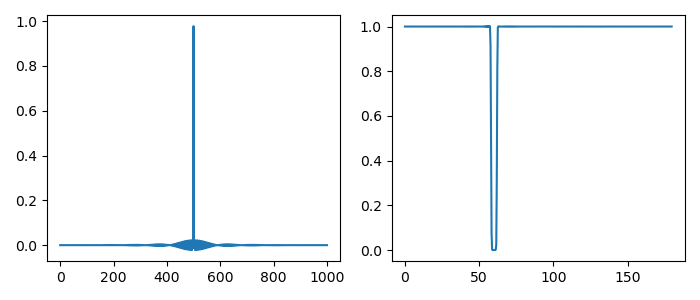

In [65]:
L = 1001
#Ruido asociado al sistema electrico 60 Hz aprox

filtroA = scipy.signal.firwin(L, [58,62], window='hamming', pass_zero=True, fs=Fs)

#Es un filtro pasabajos pues queremos filtrar el ruido de alta frecuencia del sistema eléctrico
#Por lo que filtramos las frecuencias alrededor de 60 Hz con un rechazabanda
freq, H = scipy.signal.freqz(filtroA, fs=Fs)

fig, ax = plt.subplots(1,2, figsize=(7, 3), tight_layout=True)
ax[0].plot(filtroA)
ax[1].plot(freq, np.absolute(H))

<IPython.core.display.Javascript object>


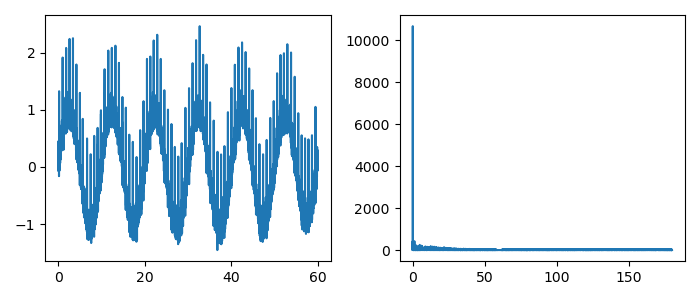

In [66]:
#Convolucion con filtro A
yA = scipy.signal.convolve(data, filtroA, mode='same')
YA = fftpack.rfft(yA)
freqs = fftpack.rfftfreq(n=len(yA), d=1/Fs)

fig, ax = plt.subplots(1,2, figsize=(7, 3), tight_layout=True)
ax[0].plot(time[:len(yA)], yA)
ax[1].plot(freqs, np.absolute(YA))

**Calcule la resta entre la señal original y la señal filtrada. ¿Qué espera observar en este caso?**

Al restar la senal filtrada de la original debería quedar lo que se filtro, en este caso ruido electrico de 60 Hz.

<IPython.core.display.Javascript object>


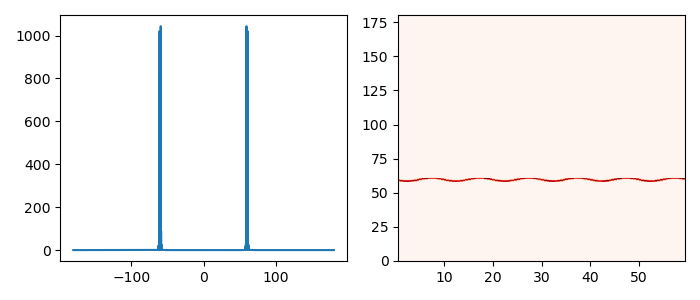

In [49]:
#Resta con filtro A
rA = data[:len(yA)] - yA

freqs1, SA, SP=fourierfun(rA,Fs)
freqs2, times, Sxx = scipy.signal.spectrogram(rA, fs=Fs, nperseg=Nw, 
                                                 noverlap=Nw//1.5, window=('kaiser', beta))

fig, ax = plt.subplots(1,2, figsize=(7, 3), tight_layout=True)
ax[0].plot(fftpack.fftshift(freqs1),fftpack.fftshift(SA))
ax[1].pcolormesh(times, freqs2, Sxx, cmap=plt.cm.Reds, shading='auto');

**Discutir efectividad filtro A**

El filtro fue efectivo pues podemos ver que en la resta aparecen los elementos que deseabamos eliminar tanto en el espectograma como en el espectro de amplitud.


### Filtro B

<IPython.core.display.Javascript object>


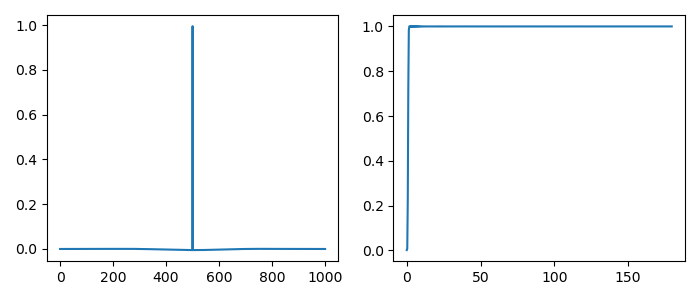

In [50]:
# 1-1.6 latidos por segundo
# Ruido de baja frecuencia < 1 Hz
filtroB = scipy.signal.firwin(L, 0.9, window='hamming', pass_zero=False, fs=Fs)

#Es un filtro pasa alto pues queremos filtrar el ruido de frecuencia baja.

freq, H = scipy.signal.freqz(filtroB, fs=Fs)

fig, ax = plt.subplots(1,2, figsize=(7, 3), tight_layout=True)
ax[0].plot(filtroB)
ax[1].plot(freq, np.absolute(H))

<IPython.core.display.Javascript object>


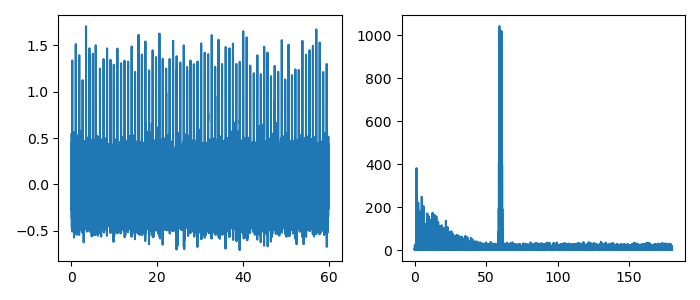

In [51]:
yB = scipy.signal.convolve(data, filtroB, mode='same')
YB = fftpack.rfft(yB)
freqs = fftpack.rfftfreq(n=len(yB), d=1/Fs)

fig, ax = plt.subplots(1,2, figsize=(7, 3), tight_layout=True)
ax[0].plot(time[:len(yB)], yB)
ax[1].plot(freqs, np.absolute(YB))

**Calcule la resta entre la señal original y la señal filtrada. ¿Qué espera observar en este caso?**

Al restar la senal filtrada de la original debería quedar lo que se filtro, en este caso el ruido de baja frecuencia, entonces en este caso deberian quedar las senales < 0.9 Hz.

<IPython.core.display.Javascript object>


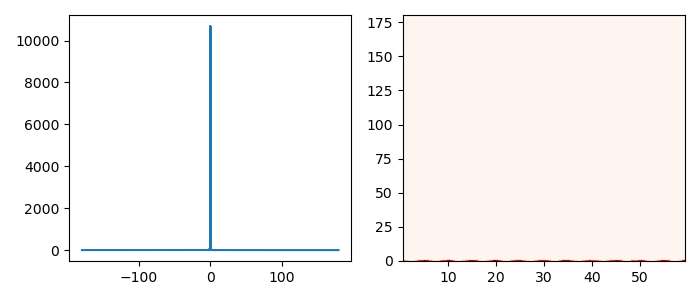

In [52]:
# resta filtro B
rB = data[:len(yB)] - yB

freqs1, SA, SP=fourierfun(rB,Fs)
freqs2, times, Sxx = scipy.signal.spectrogram(rB, fs=Fs, nperseg=Nw, 
                                                 noverlap=Nw//1.5, window=('kaiser', beta))

fig, ax = plt.subplots(1,2, figsize=(7, 3), tight_layout=True)
ax[0].plot(fftpack.fftshift(freqs1),fftpack.fftshift(SA))
ax[1].pcolormesh(times, freqs2, Sxx, cmap=plt.cm.Reds, shading='auto');

**Discutir efectividad filtro B**

Podemos ver en ambos gráficos de la resta que aparece el ruido de menor frecuencia (aunque quiza sea necesario haccer zoom para verlo en el espectograma), por lo que podemos concluir que el filtro lo elimino exitosamente de la señal real.


### Filtro C

<IPython.core.display.Javascript object>


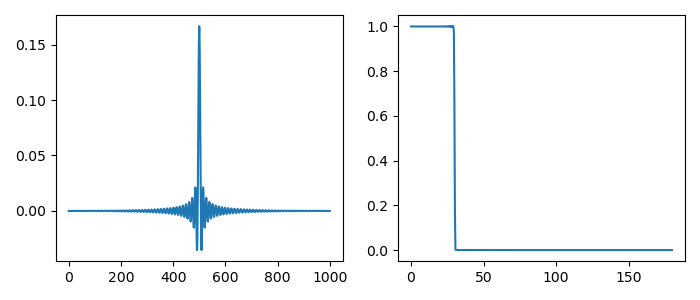

In [53]:
#Ruido blanco distribuido por el espectro.

filtroC = scipy.signal.firwin(L, 30, window='hamming', pass_zero=True, fs=Fs)

#Es un filtro pasabajo pues el ruido blanco se encuentra distribuido en un rango mas amplio que queremos filtrar.

freq, H = scipy.signal.freqz(filtroC, fs=Fs)

fig, ax = plt.subplots(1,2, figsize=(7, 3), tight_layout=True)
ax[0].plot(filtroC)
ax[1].plot(freq, np.absolute(H))



<IPython.core.display.Javascript object>


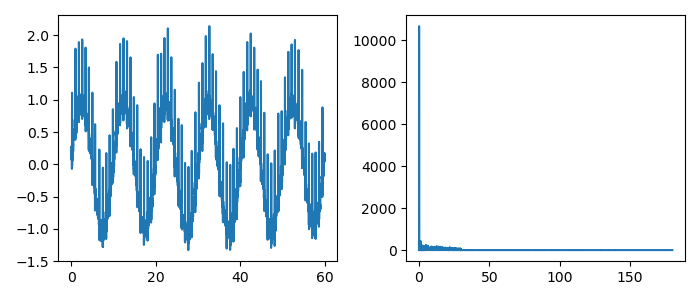

In [54]:
yC = scipy.signal.convolve(data, filtroC, mode='same')
YC = fftpack.rfft(yC)
freqs = fftpack.rfftfreq(n=len(yC), d=1/Fs)

fig, ax = plt.subplots(1,2, figsize=(7, 3), tight_layout=True)
ax[0].plot(time[:len(yC)], yC)
ax[1].plot(freqs, np.absolute(YC))

**Calcule la resta entre la señal original y la señal filtrada. ¿Qué espera observar en este caso?**

Al restar la senal filtrada de la original debería quedar lo que se filtro, en este caso una nube de ruido blanco.

<IPython.core.display.Javascript object>


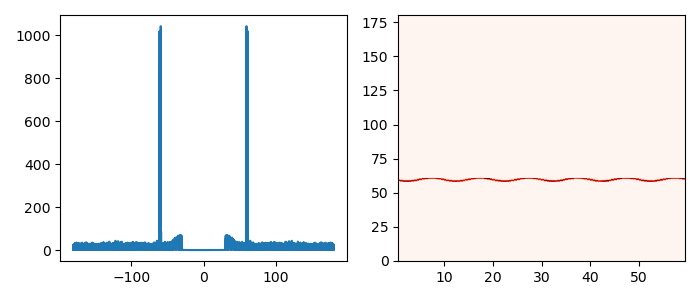

In [55]:

rC = data[:len(yC)] - yC

freqs1, SA, SP=fourierfun(rC,Fs)
freqs2, times, Sxx = scipy.signal.spectrogram(rC, fs=Fs, nperseg=Nw, 
                                                 noverlap=Nw//1.5, window=('kaiser', beta))

fig, ax = plt.subplots(1,2, figsize=(7, 3), tight_layout=True)
ax[0].plot(fftpack.fftshift(freqs1),fftpack.fftshift(SA))
ax[1].pcolormesh(times, freqs2, Sxx, cmap=plt.cm.Reds, shading='auto');

**Discutir efectividad filtro C**

Podemos ver en ambos gráficos de la resta que pudimos efectivamente disminuir parte del rudio blanco usando el filtro pasabajo, quedan fuera en el gráfico de amplitud la mayoria del ruido aleatorio.

### Filtrar señal

<IPython.core.display.Javascript object>


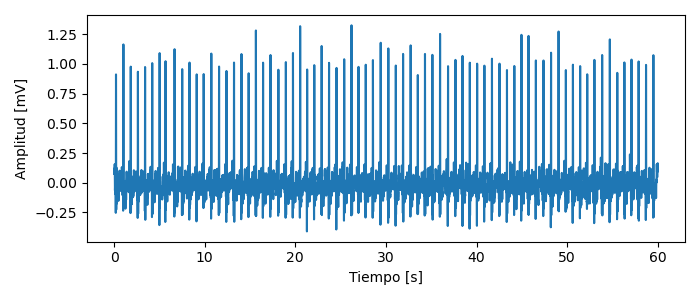

In [56]:
#Filtrar
fil_fir = scipy.signal.convolve(data, filtroA, mode='same')
fil_fir = scipy.signal.convolve(fil_fir, filtroB, mode='same')
fil_fir = scipy.signal.convolve(fil_fir, filtroC, mode='same')

fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time, fil_fir)
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud [mV]');


<IPython.core.display.Javascript object>


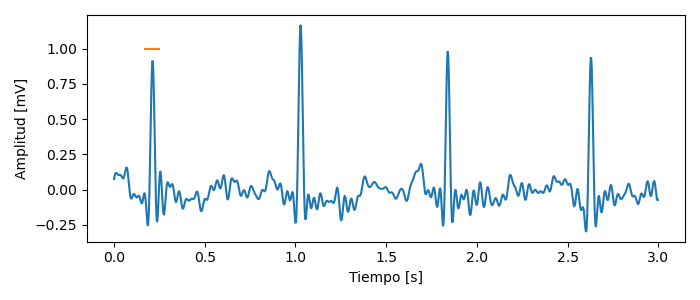

In [62]:
# Mostrar 3 seg, marcar fase R
peak1 = np.argmax(fil_fir[:int(0.5*Fs)]) / Fs
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time[:3*Fs], fil_fir[:3*Fs])
ax.plot([peak1 - 14/Fs, peak1 + 14/Fs], [1,1])
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud [mV]');


<IPython.core.display.Javascript object>


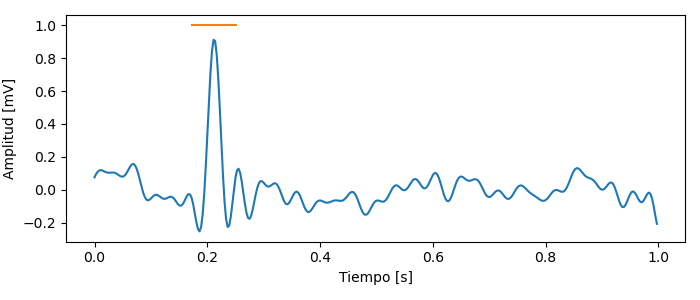

In [63]:
# Para visualizar mejor el segmento R, hagamos zoom a 1 segundo.
peak1 = np.argmax(fil_fir[:int(0.5*Fs)]) / Fs
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time[:1*Fs], fil_fir[:1*Fs])
ax.plot([peak1 - 14/Fs, peak1 + 14/Fs], [1,1])
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud [mV]');

In [58]:
# Funcion que mide tiempo RR
def RR(signal, Fs):
    offset = int(0.5 * Fs)
    rrs = []
    prr = 0
    for i, e in enumerate(signal):
        l = max(0, i - offset)
        r = min(len(signal), i + offset)
        if e == max(signal[l:r]):
            f = Fs / (i - prr)
            prr = i
            rrs.append(f)
    return (len(signal) / Fs) / len(rrs), rrs[1:]

rr, rrs = RR(fil_fir, Fs)

print("El tiempo RR promedio sería {} segundos, lo que corresponde a una frecuencia promedio de {} Hz o {} latidos por minuto.".format(rr,1/rr,60/rr))

El tiempo RR promedio sería 0.8108108108108109 segundos, lo que corresponde a una frecuencia promedio de 1.2333333333333332 Hz o 74.0 latidos por minuto.


<IPython.core.display.Javascript object>


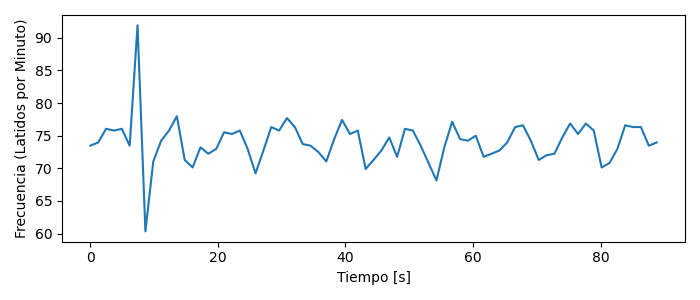

In [59]:
#Grafico de frecuencia cardiaca en el tiempo
t = [x/rr for x in range(0,int(len(data)/Fs/rr - 1))]

fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(t, [i * 60 for i in rrs])
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Frecuencia (Latidos por Minuto)');

**¿Se encuentra la persona en el rango sano o no?**

Observando el gráfico, podemos ver que la persona se encuentra en el rango normal de frecuencia cardiaca (60-100 LPM) durante el periodo en que fue tomado el ECG. Aunque se acerca a un rango anotmal alrededor de los 10 segundos del ECG.

## Filtrado IIR (35%)

Describa los filtros IIR y compárelo con los filtros FIR. Describa los argumentos y el valor de retorno de la función `scipy.signal.iirfilter`.

Luego use este método para diseñar tres filtros. Los filtros deben cumplir el mismo propósito que en el caso anterior. Considere filtros IIR de tipo `butterworth` y todos del mismo orden. Aplique los filtros sobre la señal de entrada usando la función `scipy.signal.lfilter`.

El objetivo es encontrar el mínimo orden para los filtros IIR tal que el error medio cuadrático entre la señal filtrada IIR y la señal filtrada FIR sea menor que un 1% de la varianza de la señal filtrada FIR. Es decir que si $x$ es la señal filtrada IIR e $y$ es la señal filtrada FIR donde $N = \min(\text{len}(x), \text{len}(y))$ se cumpla que

$$
\sum_{i=1}^N (x_i - y_i)^2 < 0.01 \sum_{i=1}^N (y_i - \bar y_i)^2
$$

Finalmente, discuta sobre sus hallazgos muestre gráficamente el resultado del mejor filtro IIR


**Describa los filtros IIR y compárelo con los filtros FIR. Describa los argumentos y el valor de retorno de la función "scipy.signal.iirfilter"**

Los filtros IIR (respuesta infinita al impulso) se podrían decir que son una versión más avanzada de los FIR, al igual que ellos son un tipo de filtro usado para el procesamiento de señales, y como su nombre lo indica la diferencia esta en su duración en el dominio de tiempo. Mientraz que un FIR es finito y eventualmente tendera a 0, el IIR usa recursión para poder seguir operando infinitamente, usando sus salidas como entradas para las siguientes operaciones, y tiene dos grupos de coeficientes: los coeficientes "b" o del numerador, que afecta los valores de entreda de la señal, y coeficientes "a" o del denominador, que afectan los inputs provenientes del mismo filtro, que usa recursivamente.

**Describa los argumentos y el valor de retorno de la función "scipy.signal.iirfilter"**

    Parametros:
                N: Orden del filtro.
                Wn: Frecuencia(s) crítica(s).
                rp: Onda máxima para pasabanda en filtros elípticos y de Chebyshev.
                rs: Atenuación mínima para rechazabanda en filtros elípticos y de Chebyshev.
                btype: Tipo de filtro, por defecto pasabanda.
                analog: Retorna un filtro analogico si es verdadero, en otro caso digital.
                ftype: Que tipo de filtro IIR se diseñara.
                output: Que tipo de output se desea (‘ba’, ‘zpk’, ‘sos’).
                fs: Frecuencia de muestreo original.
    Retorna:
                b,a: Numerador y denominador del filtro.
                z,p,k: ceros, poles y ganancia de la función filtro.
                sos: Representación de intersecciones de segundo orden del filtro.
            




<IPython.core.display.Javascript object>


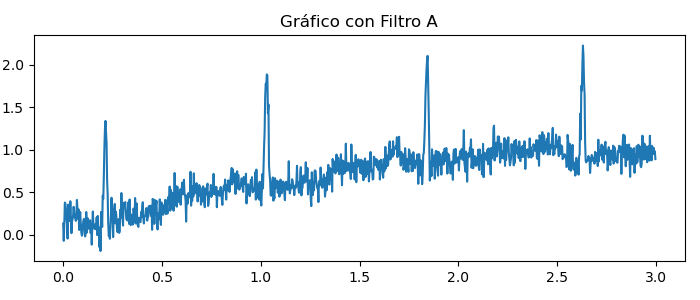

<IPython.core.display.Javascript object>


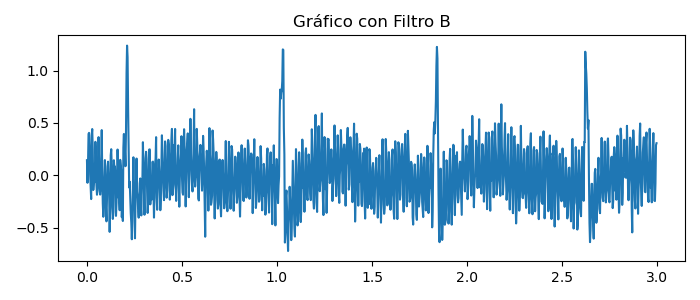

<IPython.core.display.Javascript object>


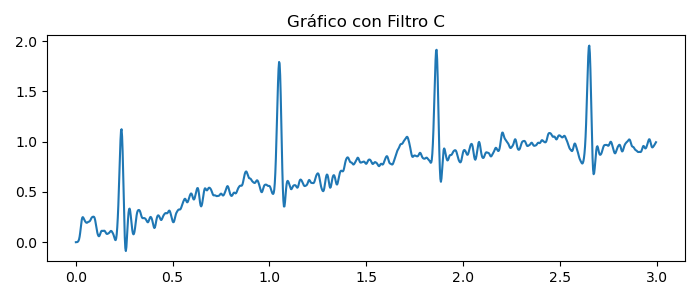

<IPython.core.display.Javascript object>


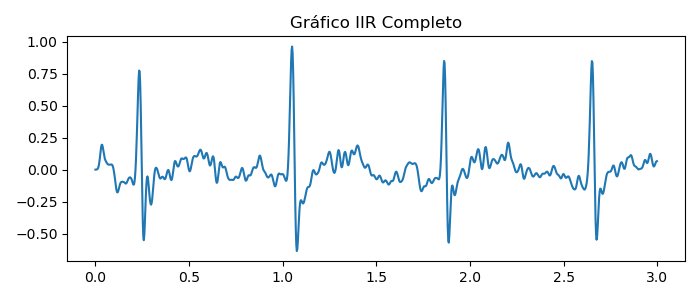

Text(0.5, 1.0, 'Gráfico IIR Completo')

In [103]:
# Diseñar y Aplicar filtros IIR
N = 6
bA, aA = scipy.signal.iirfilter(N=N, Wn=[58,62], fs=Fs, ftype='butterworth', btype='bandstop') # filtro A
bB, aB = scipy.signal.iirfilter(N=N, Wn=0.9, fs=Fs, ftype='butterworth', btype='highpass') # filtro B
bC, aC = scipy.signal.iirfilter(N=N, Wn=30, fs=Fs, ftype='butterworth', btype='lowpass') # filtro C

fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time[:3*Fs], scipy.signal.lfilter(bA, aA, data)[:3*Fs])
plt.title("Gráfico con Filtro A")

fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time[:3*Fs], scipy.signal.lfilter(bB, aB, data)[:3*Fs])
plt.title("Gráfico con Filtro B")

fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time[:3*Fs], scipy.signal.lfilter(bC, aC, data)[:3*Fs])
plt.title("Gráfico con Filtro C")

fil_iir = scipy.signal.lfilter(bA, aA, data)
fil_iir = scipy.signal.lfilter(bB, aB, fil_iir)
fil_iir = scipy.signal.lfilter(bC, aC, fil_iir)

fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time[:3*Fs], fil_iir[:3*Fs])
plt.title("Gráfico IIR Completo")

In [87]:
#Encontrar mejor valor de orden N

def mse(A, B):
    return np.sum(np.square(A - B))

fir_var = mse(fil_fir, np.mean(fil_fir))
n = 1
iir_mse = 1e9
best_mse= 1e9
best_n=1e9
while (iir_mse >= 0.01 * fir_var and iir_mse-best_mse<1e9):
    bA, aA = scipy.signal.iirfilter(N=n, Wn=[58,60], fs=Fs, ftype='butterworth', btype='bandstop') # filtro A
    bB, aB = scipy.signal.iirfilter(N=n, Wn=0.9, fs=Fs, ftype='butterworth', btype='highpass') # filtro B
    bC, aC = scipy.signal.iirfilter(N=n, Wn=30, fs=Fs, ftype='butterworth', btype='lowpass') # filtro C

    fil_iir = scipy.signal.lfilter(bA, aA, data)
    fil_iir = scipy.signal.lfilter(bB, aB, fil_iir)
    fil_iir = scipy.signal.lfilter(bC, aC, fil_iir)
    iir_mse = mse(fil_fir, fil_iir)
    if iir_mse < best_mse:
        best_mse=iir_mse
        best_n=n 
    n += 1 

print("El mejor orden encontrado es {}, que da un EMC de {}, que es el {}% de la varianza {}.".format(best_n,best_mse,100*best_mse/fir_var,fir_var))

El mejor orden encontrado es 2, que da un EMC de 320.71495902822056, que es el 52.401355187780865% de la varianza 612.0356198402403


A continuación, mostramos el gráfico IIR usando el mejor orden y lo comparamos con el gráfico FIR anterior.

<ipython-input-101-aa2588a86aa7>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)


<IPython.core.display.Javascript object>


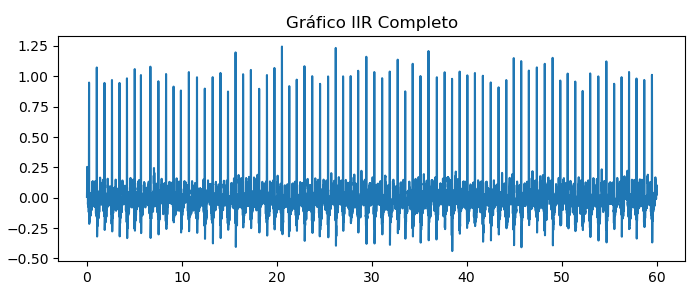

<IPython.core.display.Javascript object>


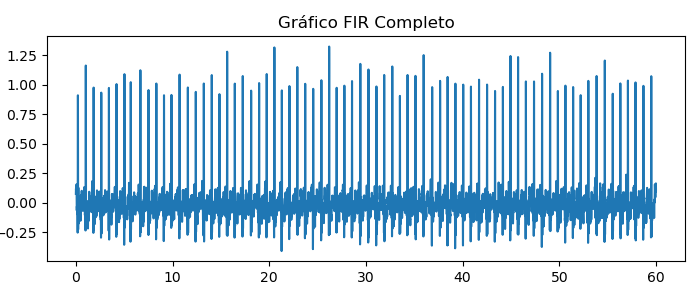

<IPython.core.display.Javascript object>


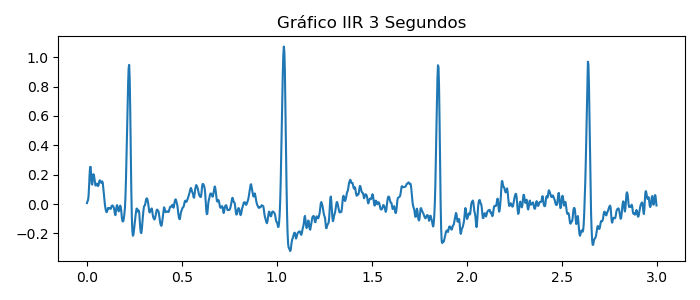

<IPython.core.display.Javascript object>


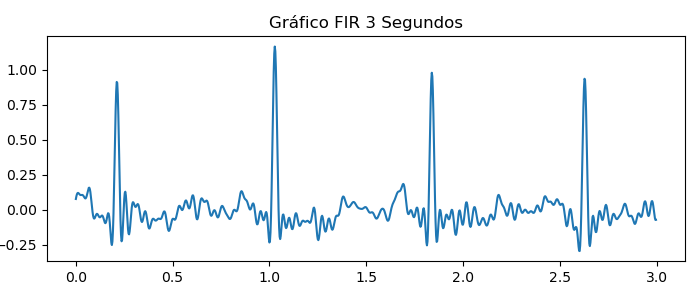

Text(0.5, 1.0, 'Gráfico FIR 3 Segundos')

In [101]:
#Graficar
N = best_n
bA, aA = scipy.signal.iirfilter(N=N, Wn=[58,62], fs=Fs, ftype='butterworth', btype='bandstop') # filtro A
bB, aB = scipy.signal.iirfilter(N=N, Wn=0.9, fs=Fs, ftype='butterworth', btype='highpass') # filtro B
bC, aC = scipy.signal.iirfilter(N=N, Wn=30, fs=Fs, ftype='butterworth', btype='lowpass') # filtro C

fil_iir = scipy.signal.lfilter(bA, aA, data)
fil_iir = scipy.signal.lfilter(bB, aB, fil_iir)
fil_iir = scipy.signal.lfilter(bC, aC, fil_iir)

fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time, fil_iir)
plt.title("Gráfico IIR Completo")

fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time, fil_fir)
plt.title("Gráfico FIR Completo")

fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time[:3*Fs], fil_iir[:3*Fs])
plt.title("Gráfico IIR 3 Segundos")


fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time[:3*Fs], fil_fir[:3*Fs])
plt.title("Gráfico FIR 3 Segundos")

**Muestre gráficamente el resultado del mejor filtro IIR y discuta sobre sus hallazgos**

Lamentablemente no fuimos capaces de alcanzar el objetivo de obtener un error medio cuadrático en los datos filtrados con filtros IIR y FIR menor al 1% de la varianza el el dataset filtrado con el filtro FIR, pudiendo llegar solo al 50%.

Aún asi, comparando los gráficos podemos decir que son bastante similares tanto en la forma general como en la amplitud de las señales, incluso teniendo los mismos picos y valles, con las mismas frecuencias. Por esto consideramos que obtuvimos buenos resultados.

Entonces hallamos que es posible usar ambas metodologias para procesar señales y llegar a resultados similares, entonces se debe elegir el indicado segun las necesidades y medios que se tengan. Por ejemplo encontramos que el filtro IIR produce resultados más similares a un ECG real pero ocasionalmente demoraba más el procesar la señal, lo que podría indicar que requiere de más recursos para procesar las entradas.